In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [34]:
df=pd.read_csv('world_population.csv')

In [50]:
df = df.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))

In [51]:
df.head(4)


,rank,cca3,country,capital,continent,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area_(km²),density_(per_km²),growth_rate,world_population_percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00


In [52]:
df_continents = df.groupby('continent')\
        .agg({'2022_population':'sum'})
df_continents

,2022_population
continent,
Africa,1426730932
Asia,4721383274
Europe,743147538
North America,600296136
Oceania,45038554
South America,436816608


<AxesSubplot:xlabel='continent'>

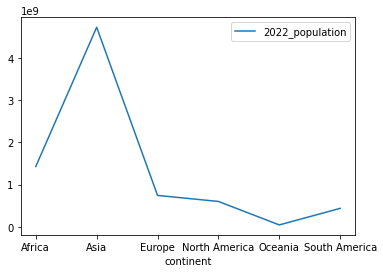

In [84]:
df_continents.plot()

In [54]:
df_continents_1 = df.groupby('continent')\
        .agg({'2022_population':'sum', '2010_population': 'sum', \
            '2000_population': 'sum', '1990_population': 'sum'})
df_continents_1

,2022_population,2010_population,2000_population,1990_population
continent,,,,
Africa,1426730932,1055228072,818946032,638150629
Asia,4721383274,4220041327,3735089604,3210563577
Europe,743147538,735613934,726093423,720320797
North America,600296136,542720651,486069584,421266425
Oceania,45038554,37102764,31222778,26743822
South America,436816608,393078250,349634282,297146415


array([<AxesSubplot:xlabel='continent'>, <AxesSubplot:xlabel='continent'>,
       <AxesSubplot:xlabel='continent'>, <AxesSubplot:xlabel='continent'>],
      dtype=object)

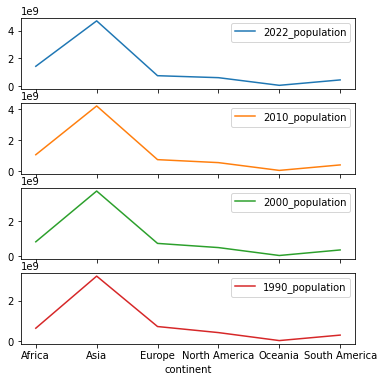

In [83]:
df_continents_1.plot(subplots=True, figsize=(6, 6))

<AxesSubplot:ylabel='2022_population'>

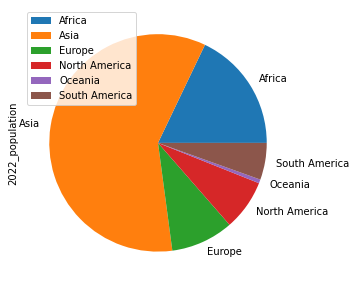

In [82]:
df_continents.plot.pie(y='2022_population', figsize=(5, 5), )

In [57]:
df_comparison=df.groupby('continent', as_index=False)\
            .agg({'2022_population': 'sum', 'density_(per_km²)': 'sum'})\
            .sort_values('2022_population', ascending=False)
df_comparison

,continent,2022_population,density_(per_km²)
1,Asia,4721383274,51251.2068
0,Africa,1426730932,7127.7158
2,Europe,743147538,33166.2371
3,North America,600296136,10910.4703
5,South America,436816608,293.6077
4,Oceania,45038554,3048.4905


<AxesSubplot:xlabel='continent', ylabel='2022_population'>

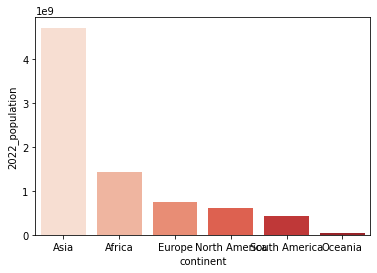

In [58]:
sns.barplot(x="continent", y="2022_population", data=df_comparison, palette='Reds')

<AxesSubplot:xlabel='continent', ylabel='growth_rate'>

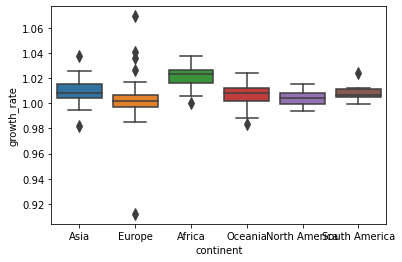

In [186]:
sns.boxplot(data = df, x = 'continent', y = 'growth_rate', fliersize=8)

In [60]:
df_median=df.groupby('continent', as_index=False)\
        .agg({'2022_population':'median', 'density_(per_km²)': 'median', 'country':'count'})
df_median

,continent,2022_population,density_(per_km²),country
0,Africa,13352864.0,59.70940,57
1,Asia,18082920.0,122.96515,50
2,Europe,5228714.0,106.86540,50
3,North America,236399.0,221.42110,40
4,Oceania,114164.0,78.24840,23
5,South America,15112555.0,17.78870,14


In [61]:
cont_data_percentage = df.groupby('continent')['world_population_percentage'].sum().round(1).sort_values(ascending= False).reset_index()
cont_data_percentage

,continent,world_population_percentage
0,Asia,59.2
1,Africa,17.9
2,Europe,9.3
3,North America,7.5
4,South America,5.5
5,Oceania,0.6


In [69]:
df_populatuion=df.sort_values('2022_population', ascending=False).head(5)
df_populatuion

,rank,cca3,country,capital,continent,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area_(km²),density_(per_km²),growth_rate,world_population_percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96


In [77]:
df_populatuion_max=df_populatuion.iloc[:, [2, 16]]
df_populatuion_max

,country,world_population_percentage
41,China,17.88
92,India,17.77
221,United States,4.24
93,Indonesia,3.45
156,Pakistan,2.96


<AxesSubplot:xlabel='country', ylabel='world_population_percentage'>

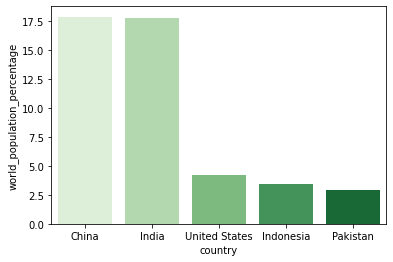

In [81]:
sns.barplot(x="country", y="world_population_percentage", data=df_populatuion_max, palette='Greens')

In [225]:
df_continents = df.groupby('continent', as_index=False)\
        .agg({'2022_population':'sum', '2020_population':'sum', '2000_population':'sum', '1970_population':'sum'})
df_continents

,continent,2022_population,2020_population,2000_population,1970_population
0,Africa,1426730932,1360671810,818946032,365444348
1,Asia,4721383274,4663086535,3735089604,2144906290
2,Europe,743147538,745792196,726093423,655923991
3,North America,600296136,594236593,486069584,315434606
4,Oceania,45038554,43933426,31222778,19480270
5,South America,436816608,431530043,349634282,192947156


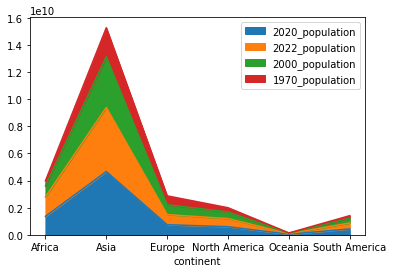

In [230]:
ax = df_continents.plot.area(x='continent', y=['2020_population', '2022_population', '2000_population', '1970_population'])